### Clustering

In [1]:
# For data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
df = pd.read_parquet('final_complete_dataset.parquet')

In [3]:
df.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0


In [4]:
df.shape

(33819106, 15)

In [5]:
#####

Since each item/input is too much dimensions for clustering, we will focus on aisle analysis. Can also do departments but hopefully might see more insights from aisle.

### Data Prep

In [6]:
# Create a crosstab of user_id and aisle
crosstable_user_aisle = pd.crosstab(df['user_id'], df['aisle'])

# Check the shape of the crosstable to understand its dimensionality
crosstable_user_aisle.shape

(206209, 134)

In [7]:
crosstable_user_aisle.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### Dimension Reduction - tSNE

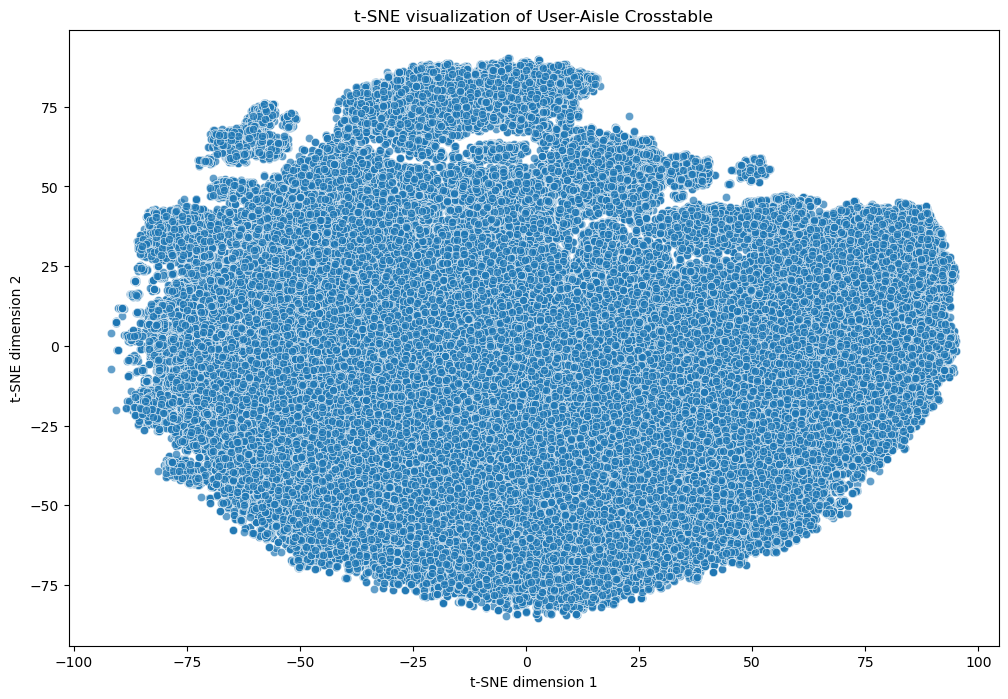

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `crosstable_user_aisle` is your DataFrame after PCA or directly for t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(crosstable_user_aisle)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], legend="full", alpha=0.7)
plt.title('t-SNE visualization of User-Aisle Crosstable')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()


### Clustering with k-means

/Users/chandrajason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chandrajason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chandrajason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chandrajason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

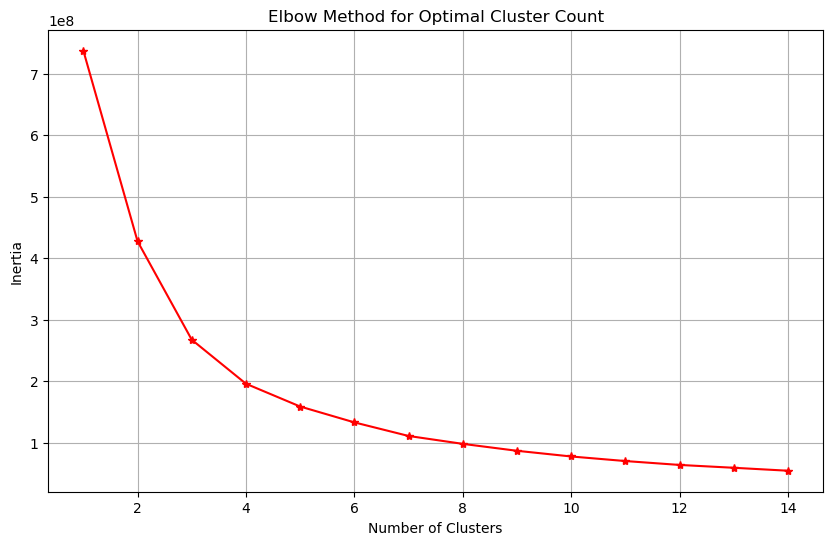

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given: X is the t-SNE transformed data with two dimensions ([0, 1]).
X_transformed = tsne_results

# Initialize a list to hold the inertia (within-cluster sum of squares) for different cluster counts
inertia_values = []

# Iterate over a range of cluster counts to evaluate inertia
for k in range(1, 15):
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    model.fit(X_transformed)
    # Append the model's inertia to the list
    inertia_values.append(model.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia_values, marker='*', linestyle='-', color='red')
plt.title('Elbow Method for Optimal Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:
## think k = 5 is best.

/Users/chandrajason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


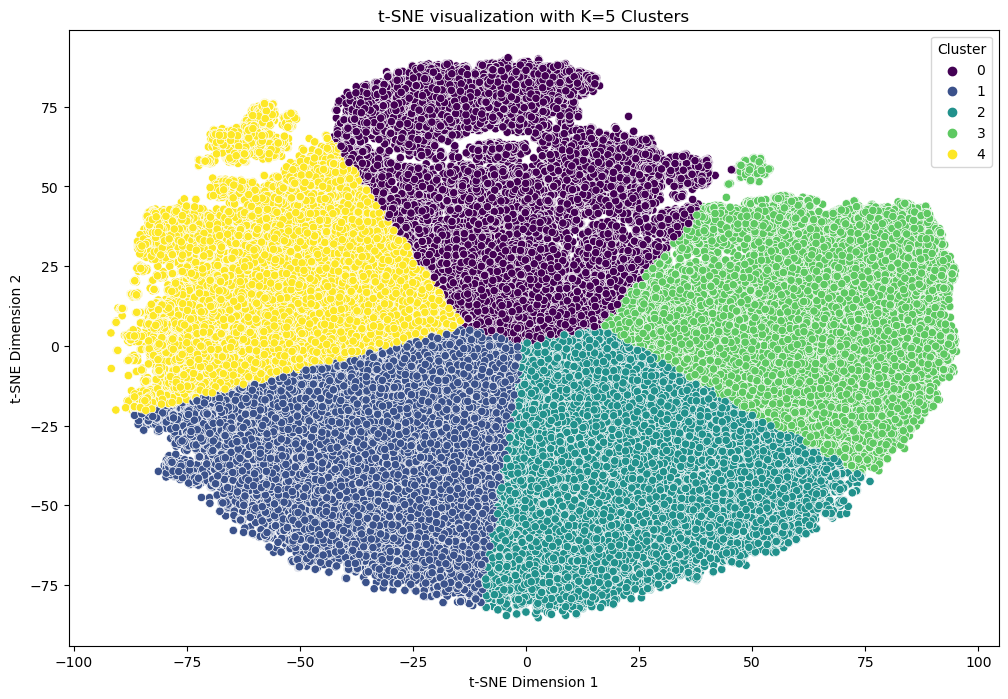

In [11]:
# Assuming `tsne_results` are already computed from the previous step
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

# Plotting the t-SNE results with cluster assignments
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('t-SNE visualization with K=5 Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()


In [13]:
# Add the cluster assignments back to the original crosstable
crosstable_user_aisle['Cluster'] = kmeans.labels_

# For each cluster, calculate the mean frequency of purchases in each aisle
for i in range(5):  # Assuming 5 clusters
    cluster_mean = crosstable_user_aisle[crosstable_user_aisle['Cluster'] == i].drop('Cluster', axis=1).mean()
    top_aisles = cluster_mean.sort_values(ascending=False).head(10)  # Top 10 aisles for this cluster
    print(f"Cluster {i} top aisles:\n{top_aisles}\n")


Cluster 0 top aisles:
aisle
fresh fruits                     11.434941
water seltzer sparkling water     8.207468
yogurt                            8.169615
packaged produce                  5.365533
chips pretzels                    4.789974
packaged vegetables fruits        4.721213
milk                              4.410925
frozen meals                      4.380099
fresh vegetables                  4.185957
refrigerated                      4.154888
dtype: float64

Cluster 1 top aisles:
aisle
fresh vegetables              5.224088
fresh fruits                  5.097386
packaged vegetables fruits    3.206402
packaged cheese               2.001566
yogurt                        1.718296
milk                          1.371998
chips pretzels                1.296926
bread                         1.175751
soy lactosefree               1.128520
frozen produce                1.118549
dtype: float64

Cluster 2 top aisles:
aisle
fresh vegetables                 17.509589
fresh fruits         

- Cluster 0 (Convenience and Snack-Oriented Shoppers): This group shows a high preference for fresh fruits, water and seltzer, yogurt, and packaged produce, suggesting a focus on convenience and healthy snacking options. They also buy a notable amount of chips and pretzels, indicating a balance between health-conscious choices and indulgence.

- Cluster 1 (Balanced Basket Shoppers): These users have a more balanced approach to their shopping, with top purchases including fresh vegetables and fruits, packaged vegetables and fruits, and dairy products like yogurt and milk. This indicates a preference for fresh produce and essentials for home cooking.

- Cluster 2 (Fresh Produce Enthusiasts): Shoppers in this cluster predominantly buy fresh vegetables and fruits, along with packaged vegetables and fruits. The presence of yogurt, packaged cheese, and milk in their top purchases also suggests a focus on fresh and healthy food items.

- Cluster 3 (Heavy Fresh Produce Buyers): This cluster stands out for their extremely high purchase volumes of fresh fruits and vegetables, indicating these are likely large households or individuals who prioritize fresh produce above all else. Their shopping list also includes a significant amount of yogurt, cheese, and milk, pointing towards a diet rich in fresh and natural foods.

- Cluster 4 (Beverage Focused Shoppers): Users in this cluster show a distinct preference for beverages, with water and seltzer topping their list, followed by soft drinks and ice cream. This suggests a shopper type that prioritizes drinks, possibly stocking up on these items in bulk.

Insights and Further Analysis Opportunities

- Health Consciousness vs. Indulgence: Clusters 0, 2, and 3 show a clear leaning towards health-conscious food choices, especially with the emphasis on fresh produce and dairy. Cluster 4, while still purchasing fresh fruits, seems to prioritize beverages, including soft drinks, indicating a different set of priorities that may lean more towards convenience or indulgence.

- Potential for Personalized Marketing: These distinct shopping patterns offer opportunities for personalized marketing strategies. For instance, Cluster 3 might respond well to promotions on organic produce or bulk buying deals, whereas Cluster 4 might be more interested in new beverage launches or discounts on snack items.

- Product Recommendation Systems: Understanding these clusters can help in designing more effective product recommendation systems. For example, suggesting fresh salad ingredients to Cluster 2 and 3 shoppers might be more effective than recommending them to Cluster 4 shoppers.

- Further Analysis: Additional insights could be gleaned by integrating more dimensions into the clustering process, such as purchase frequency, time of day for shopping, or even seasonal variations in shopping behavior. A temporal analysis could reveal how shopping patterns evolve over time or during specific periods (e.g., holidays, summer vs. winter).

- Nutritional Analysis: An interesting extension could involve analyzing the nutritional content of the most frequently purchased items in each cluster to gain insights into the dietary habits and healthiness of different shopper segments.